In [1]:
# 이거 실행하고 다시 런타임 시작
# 한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
!pip install xverse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from pykrx import stock
sns.set(font='NaNumBarunGothic')

import tensorflow as tf


from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import re
pd.options.display.max_columns = None

In [5]:
df = pd.read_csv('/content/drive/MyDrive/핀테크 파이널/data/ew지수포함안한파이널df.csv')
df.head(5)

,Unnamed: 0,KIS,Stock,Name,총자산증가율 (2018),자기자본증가율 (2018),매출액증가율 (2018),총자본영업이익율 (2018),총자본순이익율 (2018),자본금순이익율 (2018),매출액순이익율 (2018),매출액영업이익율 (2018),자기자본비율 (2018),부채비율 (2018),유보액/납입자본비율 (2018),총자본회전율 (2018),자기자본회전율 (2018),당기순이익(손실) (2018),영업활동으로인한현금흐름 (2018),총자산증가율 (2019),자기자본증가율 (2019),매출액증가율 (2019),총자본영업이익율 (2019),총자본순이익율 (2019),자본금순이익율 (2019),매출액순이익율 (2019),매출액영업이익율 (2019),자기자본비율 (2019),부채비율 (2019),유보액/납입자본비율 (2019),총자본회전율 (2019),자기자본회전율 (2019),당기순이익(손실) (2019),영업활동으로인한현금흐름 (2019),총자산증가율 (2020),자기자본증가율 (2020),매출액증가율 (2020),총자본영업이익율 (2020),총자본순이익율 (2020),자본금순이익율 (2020),매출액순이익율 (2020),매출액영업이익율 (2020),자기자본비율 (2020),부채비율 (2020),유보액/납입자본비율 (2020),총자본회전율 (2020),자기자본회전율 (2020),당기순이익(손실) (2020),영업활동으로인한현금흐름 (2020),총자산증가율 (2021),자기자본증가율 (2021),매출액증가율 (2021),총자본영업이익율 (2021),총자본순이익율 (2021),자본금순이익율 (2021),매출액순이익율 (2021),매출액영업이익율 (2021),자기자본비율 (2021),부채비율 (2021),유보액/납입자본비율 (2021),총자본회전율 (2021),자기자본회전율 (2021),당기순이익(손실) (2021),영업활동으로인한현금흐름 (2021),2018_관리종목여부,2019_관리종목여부,2020_관리종목여부,2021_관리종목여부,2018_Z,2019_Z,2020_Z,2021_Z,2018_부실기업판별_알Z,2019_부실기업판별_알Z,2020_부실기업판별_알Z,2021_부실기업판별_알Z,2018_부도확률_o,2019_부도확률_o,2020_부도확률_o,2021_부도확률_o,2018_F_score,2019_F_score,2020_F_score,2021_F_score,2018_K,2019_K,2020_K,2021_K,2018_부실여부판단_K,2019_부실여부판단_K,2020_부실여부판단_K,2021_부실여부판단_K,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목
0,0,036644,389500,(주)에스비비테크,46.03,-39.46,2.26,-5.23,-9.21,-168.76,-20.80,-11.80,20.22,394.44,340.07,0.44,1.39,-1.917031e+09,6.075800e+07,-21.16,-95.80,-34.70,-17.06,-21.67,-421.59,-79.56,-62.63,1.08,9183.55,-81.52,0.27,2.31,-4.789125e+09,-2.686112e+09,-23.07,747.37,9.76,-15.18,-19.01,-229.83,-49.59,-39.60,11.87,742.79,3.70,0.38,6.64,-3.276516e+09,-1.165070e+09,17.62,270.81,2.61,-13.65,-17.26,-138.70,-41.54,-32.85,37.41,167.32,181.23,0.42,1.62,-2.815924e+09,-1.715607e+09,0,0,0,0,NaN,NaN,NaN,NaN,3,3,3,3,0.023564,0.100115,0.111845,0.013678,1,0,1,1,14.593801,8.665832,5.088312,4.963409,2,2,2,2,0,0,0,0,0,0,0
1,1,497730,296640,(주)이노룰스,81.84,215.02,-6.23,3.88,1.43,68.58,1.90,5.16,40.95,144.17,2371.70,0.75,2.16,1.770280e+08,1.148444e+09,-1.20,32.63,43.95,17.43,3.89,210.40,4.61,20.65,54.98,81.89,2891.58,0.84,1.76,6.186920e+08,4.188603e+09,-17.63,-18.42,-20.68,8.25,11.05,519.76,14.96,11.17,54.46,83.64,3253.12,0.74,1.35,1.591312e+09,1.613872e+09,34.80,84.24,50.27,21.71,19.71,269.93,18.83,20.74,74.43,34.35,737.77,1.05,1.59,3.009484e+09,2.473444e+09,0,0,0,0,NaN,NaN,NaN,NaN,3,3,3,3,0.006766,0.000753,0.000615,0.000043,1,2,1,1,17.328700,18.460090,19.907774,23.272621,2,2,2,2,0,0,0,0,0,0,0
2,2,499459,417970,모델솔루션(주),23.53,44.46,9.65,25.30,19.34,768.48,12.97,16.97,47.94,108.60,2005.45,1.49,3.33,7.210181e+09,5.469434e+09,9.91,24.51,8.93,21.58,16.81,774.92,12.00,15.41,54.31,84.14,2521.46,1.40,2.73,7.270528e+09,1.075707e+10,-6.52,-7.50,-9.16,15.68,2.97,138.47,2.36,12.49,53.74,86.09,2324.91,1.26,2.32,1.299209e+09,8.304769e+09,14.00,18.82,9.20,18.82,15.64,391.32,11.79,14.19,56.01,78.54,907.47,1.33,2.41,7.086006e+09,9.397543e+09,0,0,0,0,NaN,NaN,NaN,NaN,3,3,3,3,0.000343,0.000377,0.001301,0.000141,1,1,1,2,26.200702,27.279234,26.704971,27.549903,2,2,2,2,0,0,0,0,0,0,0
3,3,HS8995,314140,(주)알피바이오,38.75,31.69,-5.02,8.28,5.66,146.00,6.74,9.85,58.82,70.00,1558.22,0.84,1.40,4.363446e+09,6.995499e+09,29.38,7.64,7.86,3.85,3.33,105.70,4.90,5.67,48.94,104.35,1624.67,0.68,1.28,3.423335e+09,6.582410e+09,12.53,7.59,40.18,3.37,3.75,140.12,4.71,4.25,46.79,113.72,1755.41,0.79,1.66,4.615509e+09,6.454520e+09,10.19,6.38,17.40,4.29,2.78,115.74,3.32,5.11,45.17,121.38,1873.56,0.84,1.83,3.812561e+09,9.459383e+09,0,0,0,0,NaN,NaN,NaN,NaN,3,3,3,3,0.000461,0.001132,0.001356,0.001619,1,1,2,2,21.578064,21.158629,22.112463,22.604285,2,2,2,2,0,0,0,0,0,0,0
4,4,867055,129920,(주)대성하이텍,8.36,26.30,7.67,3.96,1.57,162.88,2.10,5.32,38.03,162.97,4012.35,0.74,2.10,1.865670e+09,8.755060e+08,2.05,9.07,-17.48,4.13,2.48,254.75,4.24,7.07,40.64,146.04,3888.07,0.58,1.49,3.099913e+09,-5.228960e+09,-6.44,-38.57,-0.67,-6.91,-9.59,-910.80,-16.15,-11.63,26.69,274.72,2349.90,0.59,1.75,-1.173379e+10,1.280408e+10,20.71,-1.84,41.38,8.96

In [6]:
def make_year_df(df):

  # 종목카드 6자리로 채워주기
  df['Stock'] = df['Stock'].astype('str')
  df['Stock'] = df['Stock'].apply(lambda x: x.zfill(6) if len(x)!=6 else x) # 종목코드 6자리로 만들어주기


  
  # year = ['2018', '2019', '2020', '2021']
  col_2018 = ['Stock', 'Name']
  col_2019 = ['Stock', 'Name']
  col_2020 = ['Stock', 'Name']
  col_2021 = ['Stock', 'Name']

  for col in df.columns:
    if '2018' in col:
      col_2018.append(col)
    if '2019' in col:
      col_2019.append(col)
    if '2020' in col:
      col_2020.append(col)
    if '2021' in col:
      col_2021.append(col)

  df_2018 = df[col_2018]
  df_2019 = df[col_2019]
  df_2020 = df[col_2020]
  df_2021 = df[col_2021]

  # 일단 비재무 데이터는 빼고

  return df_2018, df_2019, df_2020, df_2021


df_2018, df_2019, df_2020, df_2021 = make_year_df(df)

In [7]:
df_2018.head(5)

,Stock,Name,총자산증가율 (2018),자기자본증가율 (2018),매출액증가율 (2018),총자본영업이익율 (2018),총자본순이익율 (2018),자본금순이익율 (2018),매출액순이익율 (2018),매출액영업이익율 (2018),자기자본비율 (2018),부채비율 (2018),유보액/납입자본비율 (2018),총자본회전율 (2018),자기자본회전율 (2018),당기순이익(손실) (2018),영업활동으로인한현금흐름 (2018),2018_관리종목여부,2018_Z,2018_부실기업판별_알Z,2018_부도확률_o,2018_F_score,2018_K,2018_부실여부판단_K
0,389500,(주)에스비비테크,46.03,-39.46,2.26,-5.23,-9.21,-168.76,-20.80,-11.80,20.22,394.44,340.07,0.44,1.39,-1.917031e+09,6.075800e+07,0,NaN,3,0.023564,1,14.593801,2
1,296640,(주)이노룰스,81.84,215.02,-6.23,3.88,1.43,68.58,1.90,5.16,40.95,144.17,2371.70,0.75,2.16,1.770280e+08,1.148444e+09,0,NaN,3,0.006766,1,17.328700,2
2,417970,모델솔루션(주),23.53,44.46,9.65,25.30,19.34,768.48,12.97,16.97,47.94,108.60,2005.45,1.49,3.33,7.210181e+09,5.469434e+09,0,NaN,3,0.000343,1,26.200702,2
3,314140,(주)알피바이오,38.75,31.69,-5.02,8.28,5.66,146.00,6.74,9.85,58.82,70.00,1558.22,0.84,1.40,4.363446e+09,6.995499e+09,0,NaN,3,0.000461,1,21.578064,2
4,129920,(주)대성하이텍,8.36,26.30,7.67,3.96,1.57,162.88,2.10,5.32,38.03,162.97,4012.35,0.74,2.10,1.865670e+09,8.755060e+08,0,NaN,3,0.001602,1,20.705556,2


In [8]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Stock                1279 non-null   object 
 1   Name                 1279 non-null   object 
 2   총자산증가율 (2018)        1279 non-null   float64
 3   자기자본증가율 (2018)       1279 non-null   float64
 4   매출액증가율 (2018)        1279 non-null   float64
 5   총자본영업이익율 (2018)      1279 non-null   float64
 6   총자본순이익율 (2018)       1279 non-null   float64
 7   자본금순이익율 (2018)       1279 non-null   float64
 8   매출액순이익율 (2018)       1279 non-null   float64
 9   매출액영업이익율 (2018)      1279 non-null   float64
 10  자기자본비율 (2018)        1279 non-null   float64
 11  부채비율 (2018)          1279 non-null   float64
 12  유보액/납입자본비율 (2018)    1279 non-null   float64
 13  총자본회전율 (2018)        1279 non-null   float64
 14  자기자본회전율 (2018)       1279 non-null   float64
 15  당기순이익(손실) (2018)     1279 non-null   f

# 데이터 불균형 정도

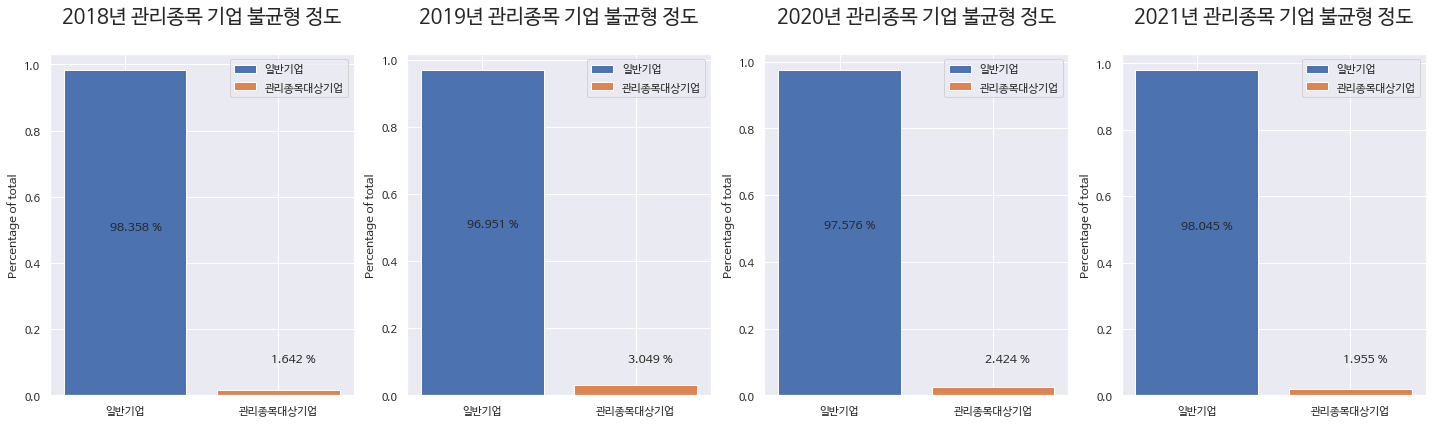

In [9]:
plt.figure(figsize=(20, 6))

# 2018년
plt.subplot(1,4,1)
ratio_ones = df_2018['2018_관리종목여부'].mean()
ratio_zeros = (len(df_2018) - df_2018['2018_관리종목여부'].sum()) / len(df_2018)

plt.bar('일반기업', height=ratio_zeros, label='일반기업')
plt.bar('관리종목대상기업', height=ratio_ones, label='관리종목대상기업')
# plt.xlabel("Target")
plt.ylabel('Percentage of total')
plt.text(-0.10, 0.5, "{0:.3f} %".format(ratio_zeros*100), fontsize=12)
plt.text(0.95, 0.1, "{0:.3f} %".format(ratio_ones*100), fontsize=12)
plt.legend()
plt.tight_layout()
plt.title('2018년 관리종목 기업 불균형 정도\n', fontsize=20)




# 2019년
plt.subplot(1,4,2)
ratio_ones = df_2019['2019_관리종목여부'].mean()
ratio_zeros = (len(df) - df_2019['2019_관리종목여부'].sum()) / len(df_2019)

plt.bar('일반기업', height=ratio_zeros, label='일반기업')
plt.bar('관리종목대상기업', height=ratio_ones, label='관리종목대상기업')
# plt.xlabel("Target")
plt.ylabel('Percentage of total')
plt.text(-0.10, 0.5, "{0:.3f} %".format(ratio_zeros*100), fontsize=12)
plt.text(0.95, 0.1, "{0:.3f} %".format(ratio_ones*100), fontsize=12)
plt.legend()
plt.tight_layout()
plt.title('2019년 관리종목 기업 불균형 정도\n', fontsize=20)




# 2020년
plt.subplot(1,4,3)
ratio_ones = df_2020['2020_관리종목여부'].mean()
ratio_zeros = (len(df_2020) - df_2020['2020_관리종목여부'].sum()) / len(df_2020)

plt.bar('일반기업', height=ratio_zeros, label='일반기업')
plt.bar('관리종목대상기업', height=ratio_ones, label='관리종목대상기업')
# plt.xlabel("Target")
plt.ylabel('Percentage of total')
plt.text(-0.10, 0.5, "{0:.3f} %".format(ratio_zeros*100), fontsize=12)
plt.text(0.95, 0.1, "{0:.3f} %".format(ratio_ones*100), fontsize=12)
plt.legend()
plt.tight_layout()
plt.title('2020년 관리종목 기업 불균형 정도\n', fontsize=20)





# 2021년
plt.subplot(1,4,4)
ratio_ones = df_2021['2021_관리종목여부'].mean()
ratio_zeros = (len(df) - df_2021['2021_관리종목여부'].sum()) / len(df_2021)

plt.bar('일반기업', height=ratio_zeros, label='일반기업')
plt.bar('관리종목대상기업', height=ratio_ones, label='관리종목대상기업')
# plt.xlabel("Target")
plt.ylabel('Percentage of total')
plt.text(-0.10, 0.5, "{0:.3f} %".format(ratio_zeros*100), fontsize=12)
plt.text(0.95, 0.1, "{0:.3f} %".format(ratio_ones*100), fontsize=12)
plt.legend()
plt.tight_layout()
plt.title('2021년 관리종목 기업 불균형 정도\n', fontsize=20)


plt.show()

- 데이터 불균형이 심함을 알 수 있다.

# 2.2 컬럼 통계지표 확인

In [10]:
df_2018.describe()

,총자산증가율 (2018),자기자본증가율 (2018),매출액증가율 (2018),총자본영업이익율 (2018),총자본순이익율 (2018),자본금순이익율 (2018),매출액순이익율 (2018),매출액영업이익율 (2018),자기자본비율 (2018),부채비율 (2018),유보액/납입자본비율 (2018),총자본회전율 (2018),자기자본회전율 (2018),당기순이익(손실) (2018),영업활동으로인한현금흐름 (2018),2018_관리종목여부,2018_Z,2018_부실기업판별_알Z,2018_부도확률_o,2018_F_score,2018_K,2018_부실여부판단_K
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1.279000e+03,1.279000e+03,1279.000000,1117.000000,1279.000000,1.279000e+03,1279.000000,1279.000000,1279.000000
mean,19.904089,29.659781,16.571892,3.953346,1.031314,149.043534,-13.599961,-7.534410,64.422002,89.252596,1567.597912,0.808053,1.613815,3.550061e+09,6.035236e+09,0.016419,7.944185,0.853010,1.363732e-02,0.971071,21.587169,1.943706
std,53.125517,130.913047,120.375053,12.154789,15.668040,1561.673143,134.388557,119.383466,20.425882,182.828332,7140.870551,0.583016,2.474594,1.692197e+10,2.003121e+10,0.127130,20.874163,1.082065,9.166708e-02,0.524762,8.734610,0.316409
min,-68.040000,-90.030000,-91.620000,-68.090000,-191.110000,-5320.590000,-2559.770000,-2722.080000,3.040000,1.270000,-75.070000,0.010000,0.010000,-1.234088e+11,-1.672801e+11,0.000000,-1.590355,0.000000,6.496511e-10,0.000000,-44.102633,0.000000
25%,-1.600000,-1.070000,-7.885000,0.120000,-2.475000,-20.295000,-3.955000,0.170000,50.100000,22.375000,372.590000,0.420000,0.610000,-1.857402e+09,-1.093832e+09,0.000000,2.215037,0.000000,5.930954e-05,1.000000,18.388053,2.000000
50%,6.790000,6.430000,3.900000,3.140000,2.830000,36.950000,3.800000,4.570000,64.940000,53.980000,839.280000,0.680000,1.090000,2.338847e+09,2.673273e+09,0.000000,3.852481,0.000000,3.593270e-04,1.000000,23.590757,2.000000
75%,22.390000,21.045000,19.970000,8.775000,7.770000,148.220000,10.500000,11.595000,81.715000,99.590000,1624.325000,1.050000,1.880000,6.866798e+09,8.875102e+09,0.000000,6.928363,2.000000,1.601775e-03,1.000000,26.863582,2.000000
max,645.120000,2284.430000,3648.630000,137.560000,114.400000,52574.620000,1307.340000,77.620000,98.750000,3185.530000,243522.090000,5.040000,60.310000,1.546099e+11,2.871206e+11,1.000000,335.703965,3.000000,1.000000e+00,2.000000,55.431036,2.000000


# 2.3 Modeling process - Feature selection


In [11]:

df_2018.drop(['Name',	'Stock'], axis=1, inplace=True)

# 설마 널값이 있어서 Voting selector 오류나나?
df_2018.fillna(0, inplace = True)

# X와 y 나눠주기
from xverse.feature_subset import SplitXY

# X데이터 y 데이터 나눠주는 함수
def splitXY(df, target_column):

  clf = SplitXY([target_column]) # Split the dateset into X and y
  X, y = clf.fit_transform(df) # 
  return X, y


# 
def make_train_test_split(X=None, y=None, test_size = 0.2, random_state=42):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
  return X_train, X_test, y_train, y_test

X, y = splitXY(df_2018, '2018_관리종목여부')
X_train, X_test, y_train, y_test = make_train_test_split(X=X, y=y, test_size = 0.2, random_state=42)

In [12]:
df_2018

,총자산증가율 (2018),자기자본증가율 (2018),매출액증가율 (2018),총자본영업이익율 (2018),총자본순이익율 (2018),자본금순이익율 (2018),매출액순이익율 (2018),매출액영업이익율 (2018),자기자본비율 (2018),부채비율 (2018),유보액/납입자본비율 (2018),총자본회전율 (2018),자기자본회전율 (2018),당기순이익(손실) (2018),영업활동으로인한현금흐름 (2018),2018_관리종목여부,2018_Z,2018_부실기업판별_알Z,2018_부도확률_o,2018_F_score,2018_K,2018_부실여부판단_K
0,46.03,-39.46,2.26,-5.23,-9.21,-168.76,-20.80,-11.80,20.22,394.44,340.07,0.44,1.39,-1.917031e+09,6.075800e+07,0,0.000000,3,0.023564,1,14.593801,2
1,81.84,215.02,-6.23,3.88,1.43,68.58,1.90,5.16,40.95,144.17,2371.70,0.75,2.16,1.770280e+08,1.148444e+09,0,0.000000,3,0.006766,1,17.328700,2
2,23.53,44.46,9.65,25.30,19.34,768.48,12.97,16.97,47.94,108.60,2005.45,1.49,3.33,7.210181e+09,5.469434e+09,0,0.000000,3,0.000343,1,26.200702,2
3,38.75,31.69,-5.02,8.28,5.66,146.00,6.74,9.85,58.82,70.00,1558.22,0.84,1.40,4.363446e+09,6.995499e+09,0,0.000000,3,0.000461,1,21.578064,2
4,8.36,26.30,7.67,3.96,1.57,162.88,2.10,5.32,38.03,162.97,4012.35,0.74,2.10,1.865670e+09,8.755060e+08,0,0.000000,3,0.001602,1,20.705556,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,146.31,77.94,10.83,8.05,7.49,24.84,16.69,17.92,45.68,118.91,93.99,0.45,0.88,3.963095e+09,2.682301e+09,0,2.995899,0,0.002614,1,18.371803,2
1275,42.14,8.83,92.45,4.43,-0.55,-2.82,-1.06,8.50,48.09,107.95,194.50,0.52,0.96,-3.391840e+08,2.333764e+09,0,1.289412,2,0.001526,1,15.139504,2
1276,-12.94,6.17,-29.81,-3.98,-16.02,-87.40,-31.83,-7.91,38.61,158.99,63.05,0.50,1.44,-1.185408e+10,-3.781308e+09,1,0.494274,2,0.008549,1,15.393361,2
1277,-22.34,13.57,59.47,10.09,7.46,196.38,6.33,8.55,50.08,99.67,800.95,1.18,2.87,1.464977e+10,-8.380533e+09,0,3.506547,0,0.000483,1,26.703552,2


In [13]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1023, 21)
(1023,)
(256, 21)
(256,)


# 3.1 Feature selection on unbalanced data
- Voting Selector(변수선택) : 이 방법도 나중에 같이 비교해보자
<pre>
알고리즘이 변수를 선택할 때, 패키지에서는 변수에 대해 투표를 진행.
마지막으로, 각각의 변수에 대해서 총 투표들을 계산하고, 투표를 기반으로 해서 최고의 것을 선택.
최소한의 노력으로 변수 선택 과정에서 최고의 변수 선택을 진행
중요 변수들을 선택하기 위해 xverse가 사용하는 방법.
1) Information Value using Weight of evidence.
2) Variable Importance using Random Forest.
3) Recursive Feature Elimination.
4) Variable Importance using Extra trees classifier.
5) Chi-Square best variables.
6) L1-based feature selection.

In [14]:
from xverse.ensemble import VotingSelector

clf = VotingSelector()
clf.fit(X_train, y_train)

TypeError: ignored

# Modeling process - Build models
- X_train
- X_test

In [15]:
X_train

,2018_F_score,2018_K,2018_Z,2018_부도확률_o,2018_부실기업판별_알Z,2018_부실여부판단_K,당기순이익(손실) (2018),매출액순이익율 (2018),매출액영업이익율 (2018),매출액증가율 (2018),부채비율 (2018),영업활동으로인한현금흐름 (2018),유보액/납입자본비율 (2018),자기자본비율 (2018),자기자본증가율 (2018),자기자본회전율 (2018),자본금순이익율 (2018),총자본순이익율 (2018),총자본영업이익율 (2018),총자본회전율 (2018),총자산증가율 (2018)
351,1,28.146309,3.288432,0.000127,0,2,1.477803e+09,0.81,3.20,-2.50,33.11,7.610836e+09,2989.91,75.13,0.43,1.24,28.35,0.74,2.93,0.92,-3.17
673,1,29.027713,4.864612,0.000005,0,2,1.517102e+10,28.80,-5.22,-12.33,8.71,1.581760e+10,2200.93,91.99,6.13,0.27,169.90,7.06,-1.28,0.24,5.94
741,2,26.441245,16.790301,0.000012,0,2,3.133630e+09,20.73,23.00,20.24,12.14,4.843611e+09,755.34,89.17,1.35,0.43,70.87,8.08,8.96,0.39,3.47
781,1,28.520508,8.329666,0.000050,0,2,2.086956e+09,7.01,9.20,-28.43,13.15,6.526733e+09,669.62,88.38,3.91,0.89,49.43,5.40,7.09,0.77,-0.55
158,1,21.934356,20.510850,0.000041,0,2,3.405285e+09,16.51,20.38,56.63,24.79,3.356793e+09,1738.13,80.14,311.54,1.12,352.82,14.05,17.34,0.85,225.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0,25.993185,5.452866,0.000296,0,2,-1.801062e+09,-2.73,-8.17,-60.00,26.99,-1.247574e+10,737.51,78.75,-5.91,0.78,-17.97,-1.61,-4.82,0.59,-13.12
1095,0,23.218463,7.503120,0.000122,0,2,4.473796e+10,4.87,-0.97,-0.53,74.69,-1.672801e+11,1163.49,57.24,-2.40,0.54,32.20,1.53,-0.31,0.31,0.67
1130,1,25.307628,6.715777,0.000032,0,2,2.407579e+10,24.60,21.79,63.03,42.92,4.492272e+10,1295.20,69.97,27.18,0.70,216.49,13.02,11.53,0.53,53.32
860,1,33.759123,4.918144,0.000061,0,2,1.513353e+09,1.29,3.49,6.62,12.82,1.310178e+10,5523.84,88.64,0.48,1.19,86.23,1.34,3.61,1.03,-3.22


In [16]:
X_test

,2018_F_score,2018_K,2018_Z,2018_부도확률_o,2018_부실기업판별_알Z,2018_부실여부판단_K,당기순이익(손실) (2018),매출액순이익율 (2018),매출액영업이익율 (2018),매출액증가율 (2018),부채비율 (2018),영업활동으로인한현금흐름 (2018),유보액/납입자본비율 (2018),자기자본비율 (2018),자기자본증가율 (2018),자기자본회전율 (2018),자본금순이익율 (2018),총자본순이익율 (2018),총자본영업이익율 (2018),총자본회전율 (2018),총자산증가율 (2018)
1239,1,23.268111,2.335938,2.989383e-03,1,2,3.152599e+09,4.64,11.33,25.30,167.03,1.790893e+09,656.10,37.45,13.87,2.26,63.16,3.75,9.15,0.81,2.89
1187,1,16.527796,1.973065,1.192986e-03,1,2,1.022899e+09,3.96,3.70,-11.60,98.55,-2.793930e+08,418.72,50.37,41.65,1.30,23.13,2.28,2.13,0.58,5.56
560,1,22.806052,2.610334,1.927142e-03,1,2,7.766700e+07,0.08,1.26,5.08,102.17,-8.467924e+09,121.03,49.46,-6.31,2.19,0.39,0.09,1.38,1.10,-3.95
767,1,24.384525,3.035885,1.506346e-04,0,2,2.503606e+09,7.83,-1.27,-7.50,37.56,1.766060e+08,1273.28,72.70,4.47,0.44,45.30,2.51,-0.41,0.32,6.17
714,1,33.258517,21.749236,2.413425e-07,0,2,1.302873e+11,27.18,30.40,-2.55,7.68,1.286501e+11,13632.84,92.87,10.94,0.60,2025.23,15.05,16.83,0.55,8.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,1,24.284289,9.804401,3.168597e-05,0,2,1.225920e+10,26.09,21.29,5.51,22.78,1.350331e+10,238.90,81.45,-0.56,0.58,50.13,12.45,10.16,0.48,0.95
958,2,26.937709,2.643351,1.532951e-04,1,2,2.480380e+09,4.00,2.27,6.79,34.18,5.701649e+09,1162.62,74.53,2.09,0.74,36.62,2.20,1.25,0.55,1.90
668,1,24.171506,2.195576,6.988205e-04,1,2,2.029529e+09,1.48,3.39,11.90,120.47,-1.555234e+09,496.78,45.36,3.87,2.97,24.85,1.91,4.38,1.29,-4.62
135,1,19.454886,5.113647,5.770825e-05,0,2,4.665594e+09,19.73,21.22,83.29,34.34,4.234305e+09,902.89,74.44,189.89,0.80,195.95,12.34,13.28,0.63,263.08


# 시도해볼만한 것.
1. Unbalanced data - Baseline model
2. Balanced data - Equal sampling
3. Oversampled data - Resampled data for 1's and same 0's
4. Bayesian Hyperparameter optimization
5. SMOTE analysis
6. ADASYN analysis
7. Outlier detection
8. GAN for data augmentation

# Model builing and evaluation functions
- Stratified K fold 사용하자

In [17]:
def build_model(X, y):
  clf = RandomForestClassifier()
  clf.fit(X, y)
  return clf

In [18]:
def evaluate_model(clf, X, y):

  pred = clf.predict(X) # predicted classes
  accuracy = accuracy_score(pred, y) # calculate accuracy
  fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1]) # roc_curve
  auc_value = auc(fpr, tpr) # auc_value
  report = classification_report(y, pred, labels=[0, 1], output_dict = True)
  report_df = pd.DataFrame(report).transpose()
  report_df = report_df.reset_index()
  model_eval = report_df[report_df['index'].str.contains('1')][['precision', 'recall', 'f1-score']]
  model_eval['accuracy'] = list(report_df[report_df['index'].str.contains('accuracy')]['support'])
  model_eval['ROC'] = auc_value
  cf_matrix = confusion_matrix(y, pred)

  return model_eval, cf_matrix

In [19]:
def model_eval_data(clf, X_train, y_train,
                    X_test, y_test,
                    model_eval_train,
                    model_eval_test,
                    Name = None):
  temp_eval_train, cf_matrix_train = evaluate_model(clf, X_train, y_train)
  temp_eval_test, cf_matrix_test = evaluate_model(clf, X_test, y_test)
  temp_eval_train.index = [Name]
  temp_eval_test.index = [Name]

  try:
    model_eval_train = model_eval_train.append(temp_eval_train)
    model_eval_test = model_eval_test.append(temp_eval_test)
  except:
    model_eval_train = temp_eval_train
    model_eval_test = temp_eval_test

  return model_eval_train, model_eval_test, cf_matrix_train, cf_matrix_test

In [20]:
def make_confusion_matrix_chart(cf_matrix_train, cf_matrix_test):

  plt.figure(1, figsize=(10,5))

  plt.subplot(121)
  sns.heatmap(cf_matrix_train, annot=True, yticklabels=['비관리종목', '관리종목'],
              xticklabels = ['비관리종목', '관리종목'], fmt='g')
  plt.ylabel('Actual')
  plt.xlabel('Pred')
  plt.ylim([0,2])
  plt.title('Train data')

  plt.subplot(122)
  sns.heatmap(cf_matrix_test, annot=True, yticklabels = ['비관리종목', '관리종목'],
              xticklabels = ['비관리종목', '관리종목'], fmt = 'g')
  plt.ylabel('Actual')
  plt.xlabel('Pred')
  plt.ylim([0, 2])
  plt.tight_layout()
  plt.title('Test data')

  plt.tight_layout()
  return None

In [21]:
model_eval_train = pd.DataFrame({}, [])
model_eval_test = pd.DataFrame({}, [])

# 4.1 Unbalanced data - Baseline model

In [22]:
clf = build_model(X_train, y_train)

model_eval_train, model_eval_test, cf_matrix_train, cf_matrix_test = model_eval_data(clf, X_train, y_train,
                                                                                     X_test, y_test,
                                                                                     model_eval_train,
                                                                                     model_eval_test,
                                                                                     Name = 'Unbalanced data - Baseline model')

In [23]:
model_eval_train

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,1.0,1.0,1.0,1.0,1.0


In [24]:
model_eval_test
#3 # f-1 score가 0이다..ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,0.0,0.0,0.0,0.988281,0.697628


# 4.1.1 Final conclusion


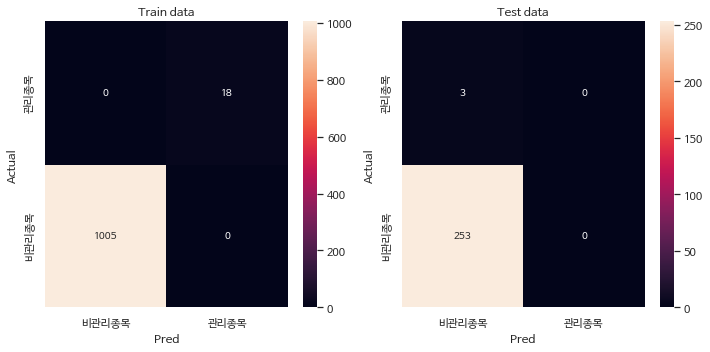

In [25]:
make_confusion_matrix_chart(cf_matrix_train, cf_matrix_test)

# 4.3 Oversampled data - Resampled data for 1's and same 0's

In [26]:
df_train = X_train.copy(deep = True)
df_train['Class'] = y_train

In [27]:
df_train.head()

,2018_F_score,2018_K,2018_Z,2018_부도확률_o,2018_부실기업판별_알Z,2018_부실여부판단_K,당기순이익(손실) (2018),매출액순이익율 (2018),매출액영업이익율 (2018),매출액증가율 (2018),부채비율 (2018),영업활동으로인한현금흐름 (2018),유보액/납입자본비율 (2018),자기자본비율 (2018),자기자본증가율 (2018),자기자본회전율 (2018),자본금순이익율 (2018),총자본순이익율 (2018),총자본영업이익율 (2018),총자본회전율 (2018),총자산증가율 (2018),Class
351,1,28.146309,3.288432,0.000127,0,2,1.477803e+09,0.81,3.20,-2.50,33.11,7.610836e+09,2989.91,75.13,0.43,1.24,28.35,0.74,2.93,0.92,-3.17,0
673,1,29.027713,4.864612,0.000005,0,2,1.517102e+10,28.80,-5.22,-12.33,8.71,1.581760e+10,2200.93,91.99,6.13,0.27,169.90,7.06,-1.28,0.24,5.94,0
741,2,26.441245,16.790301,0.000012,0,2,3.133630e+09,20.73,23.00,20.24,12.14,4.843611e+09,755.34,89.17,1.35,0.43,70.87,8.08,8.96,0.39,3.47,0
781,1,28.520508,8.329666,0.000050,0,2,2.086956e+09,7.01,9.20,-28.43,13.15,6.526733e+09,669.62,88.38,3.91,0.89,49.43,5.40,7.09,0.77,-0.55,0
158,1,21.934356,20.510850,0.000041,0,2,3.405285e+09,16.51,20.38,56.63,24.79,3.356793e+09,1738.13,80.14,311.54,1.12,352.82,14.05,17.34,0.85,225.15,0


In [28]:
df_zeros = df_train[df_train.Class ==0]
df_ones = df_train[df_train.Class==1]

In [29]:
len(df_ones)

18

In [30]:
df_ones

,2018_F_score,2018_K,2018_Z,2018_부도확률_o,2018_부실기업판별_알Z,2018_부실여부판단_K,당기순이익(손실) (2018),매출액순이익율 (2018),매출액영업이익율 (2018),매출액증가율 (2018),부채비율 (2018),영업활동으로인한현금흐름 (2018),유보액/납입자본비율 (2018),자기자본비율 (2018),자기자본증가율 (2018),자기자본회전율 (2018),자본금순이익율 (2018),총자본순이익율 (2018),총자본영업이익율 (2018),총자본회전율 (2018),총자산증가율 (2018),Class
579,0,12.769625,0.732606,0.025571,2,2,-1.339249e+10,-56.39,-12.60,-9.85,192.97,-2.181446e+09,161.78,34.13,-6.52,1.44,-247.79,-23.81,-5.32,0.42,-28.88,1
291,0,19.894479,4.161006,0.001654,0,2,-5.606227e+09,-23.20,-22.56,-12.54,50.89,-7.064004e+09,216.89,66.27,-15.04,0.59,-46.47,-8.74,-8.49,0.38,-20.23,1
912,1,6.278683,1.487109,0.002158,2,2,-5.434129e+09,-25.86,-16.52,-1.16,48.11,4.998811e+09,-46.20,67.52,-20.76,0.81,-13.05,-14.34,-9.16,0.55,-18.25,1
1023,0,17.540997,3.186265,0.051561,0,2,-3.057232e+09,-9.96,0.90,1.72,519.17,1.866287e+09,24.41,16.15,-33.05,3.93,-52.88,-11.54,1.04,1.16,173.73,1
465,1,23.465262,4.196705,0.000036,0,2,2.013159e+10,17.14,21.09,14.55,44.24,1.295462e+10,909.20,69.33,32.13,1.33,198.08,13.50,16.61,0.79,-5.56,1
732,1,23.333292,3.060158,0.001589,0,2,-2.307400e+09,-3.62,0.30,37.65,63.06,-6.350525e+09,275.62,61.33,-9.09,2.41,-33.25,-5.05,0.43,1.40,-18.30,1
1273,1,0.973194,2.315522,0.005235,1,2,-1.436933e+10,-69.57,-14.98,96.08,36.09,-3.856783e+09,220.26,73.48,34.04,0.64,-145.72,-30.29,-6.52,0.44,12.77,1
191,1,22.002301,4.375774,0.000217,0,2,6.208160e+08,2.50,15.09,22.87,29.45,-5.250101e+09,741.37,77.25,183.25,1.50,27.40,2.83,17.08,1.13,159.99,1
1259,0,7.638062,0.011663,0.019566,2,2,-6.047579e+09,-25.33,-13.67,-11.08,143.39,-3.320830e+09,257.93,41.09,34.16,1.79,-171.23,-15.21,-8.21,0.60,-12.20,1
601,1,11.712295,1.889648,0.003844,1,2,-1.436219e+10,-44.89,12.54,-11.67,112.12,8.783140e+08,136.38,47.14,-17.60,0.77,-92.57,-16.27,4.54,0.36,-17.71,1


In [31]:
# Upsample minority class
df_ones_upsampled = resample(df_ones,
                             replace=True,
                             n_samples = 1000,
                             random_state=42)

In [32]:
df_upsampled = pd.concat([df_zeros, df_ones_upsampled])


In [33]:
df_upsampled.Class.value_counts()

0    1005
1    1000
Name: Class, dtype: int64

In [34]:
X_upsampled, y_upsampled = splitXY(df_upsampled, 'Class')

In [35]:
clf = build_model(X_upsampled, y_upsampled)
upsampled_data_eval, _ = evaluate_model(clf, X_upsampled, y_upsampled)

In [36]:
model_eval_train, model_eval_test, cf_matrix_train, cf_matrix_test = model_eval_data(clf, X_train, y_train,
                                                                                     X_test, y_test,
                                                                                     model_eval_train,
                                                                                     model_eval_test,
                                                                                     Name = 'Resampled data'
                                                                                     )

In [37]:
model_eval_train

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,1.0,1.0,1.0,1.0,1.0
Resampled data,1.0,1.0,1.0,1.0,1.0


In [38]:
model_eval_test

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,0.0,0.0,0.0,0.988281,0.697628
Resampled data,0.0,0.0,0.0,0.988281,0.727273


# 4.3.1 Final conclusion

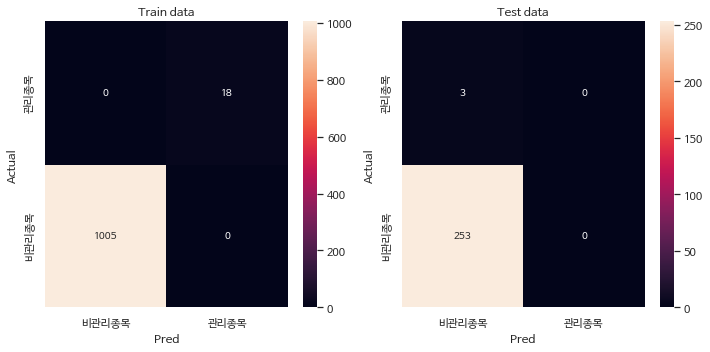

In [39]:
make_confusion_matrix_chart(cf_matrix_train, cf_matrix_test)

- 모델이 여전히 training data에 오버피팅 되어있다.

# 4.4 Bayesian Hyperparameter optimization

In [40]:
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin
from hyperopt.pyll import scope
from sklearn.model_selection import cross_val_score

In [41]:
MAX_EVALS = 50

In [42]:
def objective(params):

  clf = RandomForestClassifier(**params)
  scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
  best_score = max(scores) # extract the best score
  loss = 1-best_score

  return {'loss': loss, 'params':params, 'status':STATUS_OK}
  

In [43]:
space = {
    'max_features': hp.choice('max_features', ['auto', 'sqrt']),
    'bootstrap' : hp.choice('bootstrap', [True, False]),
    'n_estimators': scope.int(hp.quniform('n_estimators', 5, 35, 1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    'min_samples_split' : scope.int(hp.quniform('min_samples_split', 2, 10, 1)),
    'min_samples_leaf' : scope.int(hp.quniform('min_samples_leaf', 1, 5, 1))
}

In [44]:
tpe_algorithm = tpe.suggest # Algorithm
bayes_trials = Trials() # Trials object to track progress
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = MAX_EVALS, trials = bayes_trials) # Optimize

100%|██████████| 50/50 [00:12<00:00,  3.90it/s, best loss: 1.0]


In [45]:
best

{'bootstrap': 1,
 'max_depth': 8.0,
 'max_features': 1,
 'min_samples_leaf': 4.0,
 'min_samples_split': 8.0,
 'n_estimators': 19.0}

In [46]:
for key, value in best.items():
  best[key] = int(value)

In [47]:
model_eval_train, model_eval_test, cf_matrix_train, cf_matrix_test = model_eval_data(clf, X_train, y_train, 
                                                         X_test, y_test, 
                                                         model_eval_train, 
                                                         model_eval_test,
                                                         Name='Bayesian Hyperparameter Optimization')

In [48]:
model_eval_train

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,1.0,1.0,1.0,1.0,1.0
Resampled data,1.0,1.0,1.0,1.0,1.0
Bayesian Hyperparameter Optimization,1.0,1.0,1.0,1.0,1.0


In [49]:
model_eval_test

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,0.0,0.0,0.0,0.988281,0.697628
Resampled data,0.0,0.0,0.0,0.988281,0.727273
Bayesian Hyperparameter Optimization,0.0,0.0,0.0,0.988281,0.727273


# 4.4.1 Final Conclusion

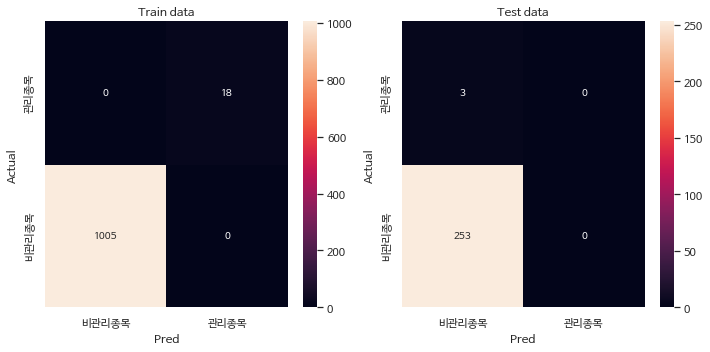

In [50]:
make_confusion_matrix_chart(cf_matrix_train, cf_matrix_test)

- 여전히 테스트 데이터는 못맞추고 있다.

# 4.5 SMOTE

In [51]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
smoteX, smoteY = sm.fit_resample(X_train, y_train)

In [52]:
print('#No. of Zeros - ', len(smoteY) - np.sum(smoteY))
print('#No. of Ones - ', np.sum(smoteY))

#No. of Zeros -  1005
#No. of Ones -  1005


In [53]:
clf = build_model(smoteX, smoteY)

In [54]:
model_eval_train, model_eval_test, cf_matrix_train, cf_matrix_test = model_eval_data(clf, X_train, y_train,
                                                                                     X_test, y_test,
                                                                                     model_eval_train,
                                                                                     model_eval_test,
                                                                                     Name = 'SMOTE Analysis')

In [55]:
model_eval_train

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,1.0,1.0,1.0,1.0,1.0
Resampled data,1.0,1.0,1.0,1.0,1.0
Bayesian Hyperparameter Optimization,1.0,1.0,1.0,1.0,1.0
SMOTE Analysis,1.0,1.0,1.0,1.0,1.0


In [56]:
model_eval_test

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,0.0,0.000000,0.00,0.988281,0.697628
Resampled data,0.0,0.000000,0.00,0.988281,0.727273
Bayesian Hyperparameter Optimization,0.0,0.000000,0.00,0.988281,0.727273
SMOTE Analysis,0.2,0.333333,0.25,0.976562,0.645586


# 4.5.1 Final Conclusion

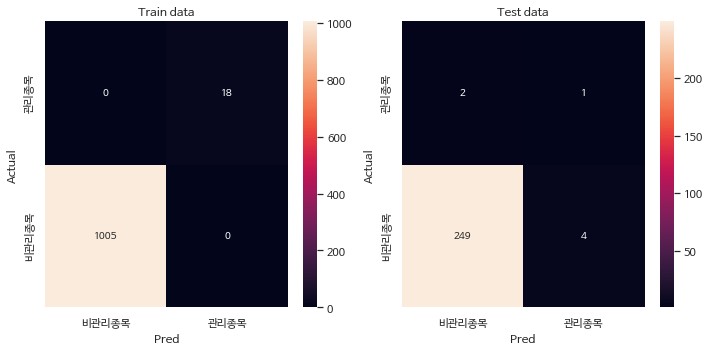

In [57]:
make_confusion_matrix_chart(cf_matrix_train, cf_matrix_test)

SMOTE도 여전히 training dataset에 오버피팅 되어있다.

# 4.6 ADASYN

In [58]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
adaX, aday = ada.fit_resample(X_train, y_train)


In [59]:
print('#No. of Zeros - ', len(adaX) - np.sum(aday))
print('#No. of Ones - ', np.sum(aday))

#No. of Zeros -  1005
#No. of Ones -  1008


In [60]:
clf = build_model(adaX, aday)

In [61]:
model_eval_train, model_eval_test, cf_matrix_train, cf_matrix_test = model_eval_data(clf, X_train, y_train, 
                                                         X_test, y_test, 
                                                         model_eval_train, 
                                                         model_eval_test,
                                                         Name='ADASYN Analysis')

In [62]:
model_eval_train

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,1.0,1.0,1.0,1.0,1.0
Resampled data,1.0,1.0,1.0,1.0,1.0
Bayesian Hyperparameter Optimization,1.0,1.0,1.0,1.0,1.0
SMOTE Analysis,1.0,1.0,1.0,1.0,1.0
ADASYN Analysis,1.0,1.0,1.0,1.0,1.0


In [63]:
model_eval_test

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,0.00,0.000000,0.000000,0.988281,0.697628
Resampled data,0.00,0.000000,0.000000,0.988281,0.727273
Bayesian Hyperparameter Optimization,0.00,0.000000,0.000000,0.988281,0.727273
SMOTE Analysis,0.20,0.333333,0.250000,0.976562,0.645586
ADASYN Analysis,0.25,0.333333,0.285714,0.980469,0.689723


# 4.6.1 Final Conclusion

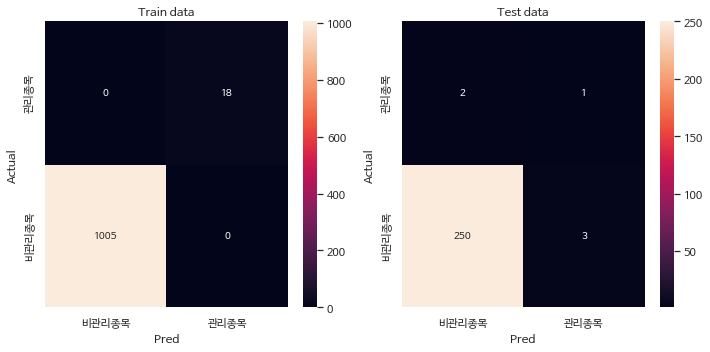

In [64]:
make_confusion_matrix_chart(cf_matrix_train, cf_matrix_test)

# 4.7 Outlier detection

In [65]:
clf = OneClassSVM(nu=0.01)

In [66]:
def rearrange_data(X, y):
  
  X_zeros = X[y==0]
  X_ones = X[y==1]
  y_zeros = y[y==0]
  y_ones = y[y==1]
  freshX = np.r_[X_zeros, X_ones]
  freshy = np.r_[[1] * len(y_zeros), [-1] * len(y_ones)]

  return X_zeros, y_zeros, freshX, freshy

In [67]:
train_X_zeros, train_y_zeros, train_freshX, train_freshy = rearrange_data(X_train, y_train)
test_X_zeros, test_y_zeros, test_freshX, test_freshy = rearrange_data(X_test, y_test)

In [68]:
clf.fit(train_X_zeros)

OneClassSVM(nu=0.01)

In [69]:
pred_train = clf.predict(train_freshX)
pred_test = clf.predict(test_freshX)

In [70]:
np.unique(pred_train)

array([-1,  1])

# 4.7.1 Model evaluation

In [71]:
def outlier_model_evaluation(y, pred):
  accuracy = accuracy_score(pred, y) # 정확도 계산
  fpr, tpr, _ = roc_curve(y, pred)
  auc_value = auc(fpr, tpr) # auc_value
  report = classification_report(y, pred, labels=[-1,1], output_dict=True)
  report_df = pd.DataFrame(report).transpose()
  report_df = report_df.reset_index()
  model_eval = report_df[report_df['index'].str.contains('-1')][['precision', 'recall', 'f1-score']]
  model_eval['accuracy'] = accuracy
  model_eval['ROC'] = auc_value
  cf_matrix = confusion_matrix(y, pred)

  return model_eval, cf_matrix

In [72]:
temp_eval_train, cf_matrix_train = outlier_model_evaluation(train_freshy, pred_train)
temp_eval_test, cf_matrix_test = outlier_model_evaluation(test_freshy, pred_test)


In [73]:
temp_eval_train, cf_matrix_train = outlier_model_evaluation(train_freshy, pred_train)
temp_eval_test, cf_matrix_test = outlier_model_evaluation(test_freshy, pred_test)

In [74]:
temp_eval_train.index = ['Outlier detection using SVM']
temp_eval_test.index = ['Outlier detection using SVM']

In [75]:
model_eval_train = model_eval_train.append(temp_eval_train)
model_eval_test = model_eval_test.append(temp_eval_test)


In [76]:
model_eval_train

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,1.000000,1.000000,1.000000,1.000000,1.000000
Resampled data,1.000000,1.000000,1.000000,1.000000,1.000000
Bayesian Hyperparameter Optimization,1.000000,1.000000,1.000000,1.000000,1.000000
SMOTE Analysis,1.000000,1.000000,1.000000,1.000000,1.000000
ADASYN Analysis,1.000000,1.000000,1.000000,1.000000,1.000000
Outlier detection using SVM,0.035714,0.166667,0.058824,0.906158,0.543035


In [77]:
model_eval_test

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,0.00,0.000000,0.000000,0.988281,0.697628
Resampled data,0.00,0.000000,0.000000,0.988281,0.727273
Bayesian Hyperparameter Optimization,0.00,0.000000,0.000000,0.988281,0.727273
SMOTE Analysis,0.20,0.333333,0.250000,0.976562,0.645586
ADASYN Analysis,0.25,0.333333,0.285714,0.980469,0.689723
Outlier detection using SVM,0.00,0.000000,0.000000,0.863281,0.436759


# 4.7.2 Final Conclusion

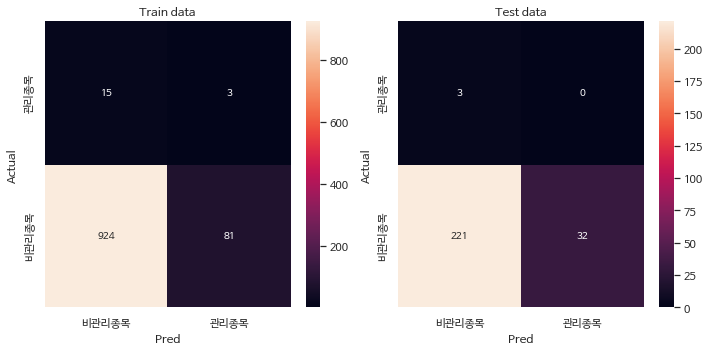

In [78]:
make_confusion_matrix_chart(np.flip(cf_matrix_train), np.flip(cf_matrix_test))

# 5. GAN based data augmentation - My idea for imbalanced classification

# tf.get_varialble()
1) tf.get_variable_scope().reuse == False일때
- 변수의 이름은 '현재 variable scope이름 + 제공된 name'으로 정해지며, 이런 이름을 가진 변수가 있는지 확인.
- 그런 변수가 존재한다면 Raise ValueError
- 그런 변수가 없다면 변수를 생성

2) tf.get_variable_scope().reuse == True 일때
- 변수의 이름은 '현재 variable scope 이름 + 제공된 name'으로 정해지며, 이런 이름을 가진 변수가 있는지 확인함
- 그런 변수가 존재한다면 해당 변수를 반환
- 그런 변수가 없다면 Raise ValueError

# tf.variable_scope()
1) tf.get_variable_scope().reuse_variables()를 호출해 현재 variable scope의 reuse 플래그를 True로 설정할 수 있음(reuse 플래그는 해당 variable scope의 변수들의 재사용(공유) 여부를 나타냄

2) 그러나 reuse 플래그를 False로 설정할 수 없음
이유 : 모델을 생성하는 함수를 구성하는 것을 허용하기 위해서이다. 이전처럼 my_image_filter(inputs) 함수를 작성한다고 상상해보자. 변수 범위에서 reuse=True와 함께 함수를 호출하는 누군가는 모든 내부 변수가 재사용될 것으로 예상한다. 함수 내부에서 reuse=False를 강제로 허용하면 이 계약이 깨지게 되고, 이런 방법으로 파라미터를 공유하는 것을 어렵게 만든다.

In [79]:
def generator(z, reuse=None):
    with tf.variable_scope("gen", reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z, units=128)
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1, hidden1)
        hidden2 = tf.layers.dense(inputs=hidden1, units=64)
        hidden2 = tf.maximum(alpha*hidden2, hidden2)
        output = tf.layers.dense(hidden2, units=21, activation=tf.nn.tanh)
        return output

In [80]:
def discriminator(X, reuse=None):
    with tf.variable_scope("dis", reuse=reuse):
        hidden1 = tf.layers.dense(inputs=X, units=128)
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1, hidden1)
        hidden2 = tf.layers.dense(inputs=hidden1, units=128)
        hidden2 = tf.maximum(alpha*hidden2, hidden2)
        logits = tf.layers.dense(hidden2, units=1)
        output = tf.sigmoid(logits)
        return output, logits

In [81]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# None은 크기가 아직 정해지지 않았음을 의미하여 들어오는 인풋의 크기에 따라 유동적으로 할당이 된다는 것을 의미.

real_data = tf.placeholder(tf.float32, shape=[None, 21])
z = tf.placeholder(tf.float32, shape=[None, 100])


Instructions for updating:
non-resource variables are not supported in the long term


In [82]:
G = generator(z)

In [83]:
D_output_real, D_logits_real = discriminator(real_data)
D_output_fake, D_logits_fake = discriminator(G, reuse=True)

In [84]:
# Loss
def loss_func(logits_in, labels_in):
  return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in, labels=labels_in))

In [85]:
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.9)
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_real))

In [86]:
D_loss = D_real_loss + D_fake_loss
G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))


In [87]:
learning_rate = 0.001
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

In [88]:
D_trainer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(D_loss, var_list = d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(G_loss, var_list = g_vars)

In [89]:
def next_batch(num, data):
  '''
  return a total of 'num' random samples
  '''
  idx = np.arange(0, len(data))
  np.random.shuffle(idx)
  idx = idx[:num]
  data_shuffle = [data.iloc[i] for i in idx]

  return np.asarray(data_shuffle)

In [90]:
X_ones = X_train[y_train==1]

In [91]:
X_ones.shape

(18, 21)

In [92]:
X_ones.reset_index(drop = True, inplace = True)

In [93]:
batch_size = 10
epochs = 5000
init = tf.global_variables_initializer()
samples = []
no_of_samples_to_generate = len(X_train) - len(X_ones) # 만들거 개수

with tf.Session() as sess:
  sess.run(init)

  for epoch in range(epochs):

    num_batches = len(X_ones) // batch_size
    for i in range(num_batches):

      batch_X = next_batch(batch_size, X_ones)
      batch_z = np.random.uniform(-1, 1, size = (batch_size, 100))

      _ = sess.run(D_trainer, feed_dict={real_data:batch_X, z: batch_z})
      _ = sess.run(G_trainer, feed_dict={z:batch_z})

    if epoch % 100 ==0:
      print("ON Epoch {}".format(epoch))

  sample_z = np.random.uniform(-1, 1, size = (no_of_samples_to_generate, 100)) # new samples will be generated
  gen_sample = sess.run(generator(z, reuse=True), feed_dict = {z:sample_z})
  samples.append(gen_sample)




ON Epoch 0
ON Epoch 100
ON Epoch 200
ON Epoch 300
ON Epoch 400
ON Epoch 500
ON Epoch 600
ON Epoch 700
ON Epoch 800
ON Epoch 900
ON Epoch 1000
ON Epoch 1100
ON Epoch 1200
ON Epoch 1300
ON Epoch 1400
ON Epoch 1500
ON Epoch 1600
ON Epoch 1700
ON Epoch 1800
ON Epoch 1900
ON Epoch 2000
ON Epoch 2100
ON Epoch 2200
ON Epoch 2300
ON Epoch 2400
ON Epoch 2500
ON Epoch 2600
ON Epoch 2700
ON Epoch 2800
ON Epoch 2900
ON Epoch 3000
ON Epoch 3100
ON Epoch 3200
ON Epoch 3300
ON Epoch 3400
ON Epoch 3500
ON Epoch 3600
ON Epoch 3700
ON Epoch 3800
ON Epoch 3900
ON Epoch 4000
ON Epoch 4100
ON Epoch 4200
ON Epoch 4300
ON Epoch 4400
ON Epoch 4500
ON Epoch 4600
ON Epoch 4700
ON Epoch 4800
ON Epoch 4900


# 5.1 Create the final dataset for classification exercise

In [94]:
np.array(samples[0]).shape

(1005, 21)

In [98]:
X_fake = pd.DataFrame(samples[0], columns = X_train.columns)

In [99]:
X_fake.head()

,2018_F_score,2018_K,2018_Z,2018_부도확률_o,2018_부실기업판별_알Z,2018_부실여부판단_K,당기순이익(손실) (2018),매출액순이익율 (2018),매출액영업이익율 (2018),매출액증가율 (2018),부채비율 (2018),영업활동으로인한현금흐름 (2018),유보액/납입자본비율 (2018),자기자본비율 (2018),자기자본증가율 (2018),자기자본회전율 (2018),자본금순이익율 (2018),총자본순이익율 (2018),총자본영업이익율 (2018),총자본회전율 (2018),총자산증가율 (2018)
0,0.151564,1.000000,0.997351,0.944190,0.372271,0.999991,-0.999983,-1.000000,1.000000,0.582884,1.000000,-0.945188,1.000000,1.000000,0.999994,0.966758,-0.999946,-0.999871,-0.999996,-0.998020,-0.995923
1,0.080201,0.999996,0.987013,0.886000,0.467789,0.999431,-0.999566,-0.999999,0.999968,0.150548,0.999997,-0.677918,0.999988,1.000000,0.999680,0.948676,-0.999700,-0.998282,-0.999855,-0.982340,-0.984805
2,-0.076582,0.999795,0.970759,0.803476,0.326006,0.997056,-0.996710,-0.999941,0.998848,0.367538,0.999815,-0.500780,0.999758,0.999999,0.997501,0.856139,-0.998301,-0.988334,-0.998008,-0.945620,-0.967097
3,0.119275,1.000000,0.999009,0.964483,0.477734,0.999996,-0.999995,-1.000000,1.000000,0.492879,1.000000,-0.943236,1.000000,1.000000,0.999999,0.989377,-0.999995,-0.999982,-0.999999,-0.999081,-0.998727
4,0.111422,1.000000,0.999489,0.984003,0.502589,0.999999,-0.999999,-1.000000,1.000000,0.763126,1.000000,-0.987111,1.000000,1.000000,1.000000,0.983792,-0.999998,-0.999998,-1.000000,-0.999755,-0.999636


In [100]:
X_augmented_data = np.append(X_train, np.array(X_fake), axis=0)
X_augmented_data.shape

(2028, 21)

In [102]:
y_fake = np.ones(no_of_samples_to_generate)
y_augmented_data = np.append(y_train, y_fake, axis=0)
y_augmented_data.shape

(2028,)

# 5.2 Train Test split

In [103]:
from sklearn.model_selection import train_test_split

aug_X_train, aug_X_test, aug_y_train, aug_y_test = train_test_split(X_augmented_data, y_augmented_data, test_size = 0.3, random_state=42)


# 5.3 Train a Random Forest model to see how it works

In [104]:
clf = build_model(aug_X_train, aug_y_train)

# 5.4 Note the evaluation is done on the original dataset

In [105]:
model_eval_train, model_eval_test, cf_matrix_train, cf_matrix_test = model_eval_data(clf, X_train, y_train,
                                                                                     X_test, y_test,
                                                                                     model_eval_train,
                                                                                     model_eval_test,
                                                                                     Name = 'GAN model - Baseline')

In [106]:
model_eval_train

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,1.000000,1.000000,1.000000,1.000000,1.000000
Resampled data,1.000000,1.000000,1.000000,1.000000,1.000000
Bayesian Hyperparameter Optimization,1.000000,1.000000,1.000000,1.000000,1.000000
SMOTE Analysis,1.000000,1.000000,1.000000,1.000000,1.000000
ADASYN Analysis,1.000000,1.000000,1.000000,1.000000,1.000000
Outlier detection using SVM,0.035714,0.166667,0.058824,0.906158,0.543035
GAN model - Baseline,1.000000,0.722222,0.838710,0.995112,0.959701


In [107]:
model_eval_test

,precision,recall,f1-score,accuracy,ROC
Unbalanced data - Baseline model,0.00,0.000000,0.000000,0.988281,0.697628
Resampled data,0.00,0.000000,0.000000,0.988281,0.727273
Bayesian Hyperparameter Optimization,0.00,0.000000,0.000000,0.988281,0.727273
SMOTE Analysis,0.20,0.333333,0.250000,0.976562,0.645586
ADASYN Analysis,0.25,0.333333,0.285714,0.980469,0.689723
Outlier detection using SVM,0.00,0.000000,0.000000,0.863281,0.436759
GAN model - Baseline,0.00,0.000000,0.000000,0.988281,0.505270


# 5.5 Final Conclusion

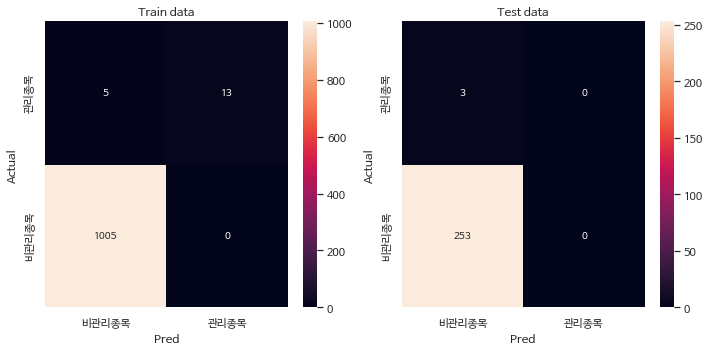

In [108]:
make_confusion_matrix_chart(cf_matrix_train, cf_matrix_test)